In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df =  pd.read_csv('C:/Users/Delight Com/Desktop/semester project/supply data/Supply_Chain_Shipment_Pricing_Data.csv')

In [5]:
df.head(3)

,id,project code,pq #,po / so #,asn/dn #,country,managed by,fulfill via,vendor inco term,shipment mode,...,unit of measure (per pack),line item quantity,line item value,pack price,unit price,manufacturing site,first line designation,weight (kilograms),freight cost (usd),line item insurance (usd)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551,29,0.97,Ranbaxy Fine Chemicals LTD,True,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,"1,000","6,200",6.2,0.03,"Aurobindo Unit III, India",True,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,"40,000",80,0.80,ABBVIE GmbH & Co.KG Wiesbaden,True,171,1653.78,NaN


# No duplicates in data

In [53]:
df.duplicated().sum()

0

In [8]:
df.dtypes

id                               object
project code                     object
pq #                             object
po / so #                        object
asn/dn #                         object
country                          object
managed by                       object
fulfill via                      object
vendor inco term                 object
shipment mode                    object
pq first sent to client date     object
po sent to vendor date           object
scheduled delivery date          object
delivered to client date         object
delivery recorded date           object
product group                    object
sub classification               object
vendor                           object
item description                 object
molecule/test type               object
brand                            object
dosage                           object
dosage form                      object
unit of measure (per pack)       object
line item quantity               object


In [10]:
df.isnull().sum()    

id                                 0
project code                       0
pq #                               0
po / so #                          0
asn/dn #                           0
country                            0
managed by                         0
fulfill via                        0
vendor inco term                   0
shipment mode                    360
pq first sent to client date       0
po sent to vendor date             0
scheduled delivery date            0
delivered to client date           0
delivery recorded date             0
product group                      0
sub classification                 0
vendor                             0
item description                   0
molecule/test type                 0
brand                              0
dosage                          1736
dosage form                        0
unit of measure (per pack)         0
line item quantity                 0
line item value                    0
pack price                         0
u

# Removing comma from id column 

In [18]:
df['id'] = df['id'].str.replace(',', '')

In [19]:
df['id']

0            1
1            3
2            4
3           15
4           16
         ...  
10319    86818
10320    86819
10321    86821
10322    86822
10323    86823
Name: id, Length: 10324, dtype: object

In [22]:
df['id'] = df['id'].astype(int)

In [23]:
df.dtypes

id                                int32
project code                     object
pq #                             object
po / so #                        object
asn/dn #                         object
country                          object
managed by                       object
fulfill via                      object
vendor inco term                 object
shipment mode                    object
pq first sent to client date     object
po sent to vendor date           object
scheduled delivery date          object
delivered to client date         object
delivery recorded date           object
product group                    object
sub classification               object
vendor                           object
item description                 object
molecule/test type               object
brand                            object
dosage                           object
dosage form                      object
unit of measure (per pack)       object
line item quantity               object


# Dealing with second column

In [24]:
df['project code'].nunique()

142

In [25]:
df['project code'].unique()

array(['100-CI-T01', '108-VN-T01', '112-NG-T01', '110-ZM-T01',
       '109-TZ-T01', '102-NG-T01', '107-RW-T01', '106-HT-T01',
       '113-ZW-T01', '108-VN-T30', '104-CI-T01', '100-HT-T01',
       '117-ET-T01', '116-ZA-T01', '123-NG-T01', '125-HT-T01',
       '102-GY-T01', '119-NA-T01', '131-NG-T01', '102-BW-T01',
       '111-MZ-T01', '144-BW-T01', '102-KE-T01', '133-NG-T01',
       '100-KZ-T01', '141-NA-T01', '114-UG-T01', '105-GY-T01',
       '139-NA-T01', '129-KG-T01', '100-SN-T01', '128-BJ-T01',
       '102-LS-T01', '130-NG-T01', '100-BW-T01', '100-ZW-T01',
       '100-PK-T01', '126-NG-T01', '151-NG-T01', '100-SZ-T01',
       '100-GH-T01', '120-AO-T01', '132-NG-T01', '153-NG-T01',
       '100-LB-T01', '151-NG-T30', '127-KE-T01', '510-KE-T01',
       '100-SL-T01', '136-RW-T01', '102-KE-T30', '110-ZM-T30',
       '106-HT-T30', '105-SS-T30', '111-MZ-T30', '102-BI-T30',
       '122-HT-T30', '161-ZA-T30', '116-ZA-T30', '133-NG-T30',
       '103-DO-T30', '104-CI-T30', '107-RW-T30', '103-M

# Frequency based on project code

In [28]:
a =[]
for i in df['project code'].unique() :
    
    count =0 
    for j in df['project code']:
        if j==i:
            count = count +1
    a.append([i,count])

In [29]:
a

[['100-CI-T01', 40],
 ['108-VN-T01', 166],
 ['112-NG-T01', 139],
 ['110-ZM-T01', 260],
 ['109-TZ-T01', 135],
 ['102-NG-T01', 42],
 ['107-RW-T01', 90],
 ['106-HT-T01', 171],
 ['113-ZW-T01', 65],
 ['108-VN-T30', 522],
 ['104-CI-T01', 314],
 ['100-HT-T01', 15],
 ['117-ET-T01', 118],
 ['116-ZA-T01', 319],
 ['123-NG-T01', 52],
 ['125-HT-T01', 9],
 ['102-GY-T01', 41],
 ['119-NA-T01', 45],
 ['131-NG-T01', 18],
 ['102-BW-T01', 30],
 ['111-MZ-T01', 200],
 ['144-BW-T01', 4],
 ['102-KE-T01', 32],
 ['133-NG-T01', 13],
 ['100-KZ-T01', 2],
 ['141-NA-T01', 4],
 ['114-UG-T01', 134],
 ['105-GY-T01', 17],
 ['139-NA-T01', 5],
 ['129-KG-T01', 2],
 ['100-SN-T01', 1],
 ['128-BJ-T01', 3],
 ['102-LS-T01', 2],
 ['130-NG-T01', 17],
 ['100-BW-T01', 4],
 ['100-ZW-T01', 44],
 ['100-PK-T01', 10],
 ['126-NG-T01', 8],
 ['151-NG-T01', 65],
 ['100-SZ-T01', 5],
 ['100-GH-T01', 10],
 ['120-AO-T01', 2],
 ['132-NG-T01', 7],
 ['153-NG-T01', 3],
 ['100-LB-T01', 8],
 ['151-NG-T30', 628],
 ['127-KE-T01', 3],
 ['510-KE-T01', 3]

## sorting based on frequency

In [40]:
sorted(a, key = lambda x:x[1],reverse = True)

[['116-ZA-T30', 768],
 ['104-CI-T30', 729],
 ['151-NG-T30', 628],
 ['114-UG-T30', 596],
 ['108-VN-T30', 522],
 ['106-HT-T30', 450],
 ['111-MZ-T30', 431],
 ['110-ZM-T30', 406],
 ['109-TZ-T30', 369],
 ['107-RW-T30', 340],
 ['116-ZA-T01', 319],
 ['161-ZA-T30', 315],
 ['104-CI-T01', 314],
 ['101-CD-T30', 308],
 ['113-ZW-T30', 263],
 ['110-ZM-T01', 260],
 ['111-MZ-T01', 200],
 ['106-HT-T01', 171],
 ['108-VN-T01', 166],
 ['105-GY-T30', 159],
 ['133-NG-T30', 145],
 ['112-NG-T01', 139],
 ['109-TZ-T01', 135],
 ['114-UG-T01', 134],
 ['117-ET-T01', 118],
 ['103-ZW-T30', 101],
 ['102-BI-T30', 98],
 ['117-ET-T30', 98],
 ['105-SS-T30', 91],
 ['107-RW-T01', 90],
 ['113-ZW-T01', 65],
 ['151-NG-T01', 65],
 ['123-NG-T01', 52],
 ['102-KE-T30', 47],
 ['102-SD-T30', 46],
 ['119-NA-T01', 45],
 ['100-ZW-T01', 44],
 ['102-NG-T01', 42],
 ['102-GY-T01', 41],
 ['100-CI-T01', 40],
 ['103-SS-T30', 37],
 ['901-CM-T30', 36],
 ['102-KE-T01', 32],
 ['105-GH-T30', 32],
 ['102-BW-T01', 30],
 ['900-SS-T30', 30],
 ['200-Z

# Column 3- price quotation no.

In [41]:
df.head(2)

,id,project code,pq #,po / so #,asn/dn #,country,managed by,fulfill via,vendor inco term,shipment mode,...,unit of measure (per pack),line item quantity,line item value,pack price,unit price,manufacturing site,first line designation,weight (kilograms),freight cost (usd),line item insurance (usd)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551,29,0.97,Ranbaxy Fine Chemicals LTD,True,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,"1,000","6,200",6.2,0.03,"Aurobindo Unit III, India",True,358,4521.5,NaN


In [44]:
df['pq #'].nunique()

1237

In [45]:
(df['pq #'] == 'Pre-PQ Process').sum()

2681

In [46]:
df['pq #'].isnull().sum()

0

### Column 4 - Order number: Purchase order (PO) for Direct Drop deliveries, or Sales Order (SO) for from Regional Delivery Center (RDC) deliveries

## multiple Purchases to a party at same time has same po no. 

In [47]:
df.columns

Index(['id', 'project code', 'pq #', 'po / so #', 'asn/dn #', 'country',
       'managed by', 'fulfill via', 'vendor inco term', 'shipment mode',
       'pq first sent to client date', 'po sent to vendor date',
       'scheduled delivery date', 'delivered to client date',
       'delivery recorded date', 'product group', 'sub classification',
       'vendor', 'item description', 'molecule/test type', 'brand', 'dosage',
       'dosage form', 'unit of measure (per pack)', 'line item quantity',
       'line item value', 'pack price', 'unit price', 'manufacturing site',
       'first line designation', 'weight (kilograms)', 'freight cost (usd)',
       'line item insurance (usd)'],
      dtype='object')

In [48]:
df['po / so #'].nunique()

6233

In [49]:
df['po / so #'].isnull().sum()

0

# Column 5 -  asn/dn no. 

### Shipment number: Advanced Shipment Note (ASN) for Direct Drop deliveries, or Delivery Note (DN) for from RDC deliveries

##  Note : 2 orders with same ASN no. will delivered to customer at same time

## Suppose 3 orders have same po no. , but two have same ASN no. and third as different ASN No. , then --> All three orderes were given to same manufacturer at same date, but manufacture deliver two orders with same ASN No. to the client on same date , and one order with different ASN No. on different date

In [54]:
df.head(2)

,id,project code,pq #,po / so #,asn/dn #,country,managed by,fulfill via,vendor inco term,shipment mode,...,unit of measure (per pack),line item quantity,line item value,pack price,unit price,manufacturing site,first line designation,weight (kilograms),freight cost (usd),line item insurance (usd)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551,29,0.97,Ranbaxy Fine Chemicals LTD,True,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,"1,000","6,200",6.2,0.03,"Aurobindo Unit III, India",True,358,4521.5,NaN


In [55]:
df['asn/dn #'].nunique()

7030

In [56]:
df['asn/dn #'].isnull().sum()

0

In [57]:
df['asn/dn #'].duplicated().sum()

3294

In [59]:
df['asn/dn #'][df['asn/dn #'].duplicated()]

49       ASN-1665
58       ASN-2293
79       ASN-3553
80       ASN-3553
82       ASN-3553
           ...   
10318     DN-4307
10319     DN-4307
10320     DN-4313
10321     DN-4316
10323     DN-4336
Name: asn/dn #, Length: 3294, dtype: object

# Column 6 -  Country  (Destination country)

In [60]:
df['country'].nunique()

43

In [61]:
df['country'].unique()

array(["Côte d'Ivoire", 'Vietnam', 'Nigeria', 'Zambia', 'Tanzania',
       'Rwanda', 'Haiti', 'Zimbabwe', 'Ethiopia', 'South Africa',
       'Guyana', 'Namibia', 'Botswana', 'Mozambique', 'Kenya',
       'Kazakhstan', 'Uganda', 'Kyrgyzstan', 'Senegal', 'Benin',
       'Lesotho', 'Pakistan', 'Swaziland', 'Ghana', 'Angola', 'Lebanon',
       'Sierra Leone', 'Cameroon', 'South Sudan', 'Burundi',
       'Dominican Republic', 'Malawi', 'Congo, DRC', 'Sudan', 'Mali',
       'Guatemala', 'Togo', 'Afghanistan', 'Liberia', 'Burkina Faso',
       'Guinea', 'Libya', 'Belize'], dtype=object)

In [79]:
df['country'].isnull().sum()

0

In [62]:
a =[]
for i in df['country'].unique() :
    
    count =0 
    for j in df['country']:
        if j==i:
            count = count +1
    a.append([i,count])

In [65]:
a = sorted(a, key = lambda x:x[1],reverse = True)
a

[['South Africa', 1406],
 ['Nigeria', 1194],
 ["Côte d'Ivoire", 1083],
 ['Uganda', 779],
 ['Vietnam', 688],
 ['Zambia', 683],
 ['Haiti', 655],
 ['Mozambique', 631],
 ['Zimbabwe', 538],
 ['Tanzania', 519],
 ['Rwanda', 430],
 ['Congo, DRC', 333],
 ['Guyana', 237],
 ['Ethiopia', 216],
 ['South Sudan', 164],
 ['Kenya', 111],
 ['Burundi', 98],
 ['Namibia', 95],
 ['Cameroon', 75],
 ['Botswana', 70],
 ['Ghana', 58],
 ['Dominican Republic', 52],
 ['Sudan', 46],
 ['Swaziland', 35],
 ['Mali', 17],
 ['Pakistan', 15],
 ['Guatemala', 15],
 ['Malawi', 14],
 ['Benin', 13],
 ['Lebanon', 8],
 ['Libya', 8],
 ['Angola', 7],
 ['Liberia', 6],
 ['Lesotho', 4],
 ['Sierra Leone', 4],
 ['Senegal', 3],
 ['Togo', 3],
 ['Afghanistan', 3],
 ['Kazakhstan', 2],
 ['Kyrgyzstan', 2],
 ['Burkina Faso', 2],
 ['Guinea', 1],
 ['Belize', 1]]

## Top 10 benifeted countries, with maximum shipment took place

In [74]:
country =[]
for i in range(0,10):
    country.append(a[i][0])
country

['South Africa',
 'Nigeria',
 "Côte d'Ivoire",
 'Uganda',
 'Vietnam',
 'Zambia',
 'Haiti',
 'Mozambique',
 'Zimbabwe',
 'Tanzania']

In [76]:
count =[]
for i in range(0,10):
    count.append(a[i][1])
count

[1406, 1194, 1083, 779, 688, 683, 655, 631, 538, 519]

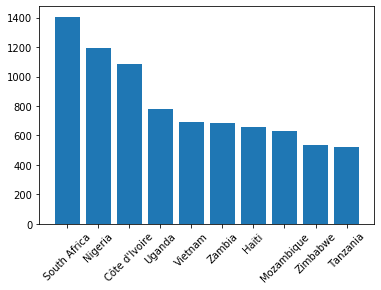

In [78]:
plt.bar(country, count)
plt.xticks(rotation=45)
plt.show()

# Column 7 - Managed by

### SCMS managing office: either the Program Management Office (PMO) in the U.S. or the relevant SCMS field office

In [80]:
df.columns

Index(['id', 'project code', 'pq #', 'po / so #', 'asn/dn #', 'country',
       'managed by', 'fulfill via', 'vendor inco term', 'shipment mode',
       'pq first sent to client date', 'po sent to vendor date',
       'scheduled delivery date', 'delivered to client date',
       'delivery recorded date', 'product group', 'sub classification',
       'vendor', 'item description', 'molecule/test type', 'brand', 'dosage',
       'dosage form', 'unit of measure (per pack)', 'line item quantity',
       'line item value', 'pack price', 'unit price', 'manufacturing site',
       'first line designation', 'weight (kilograms)', 'freight cost (usd)',
       'line item insurance (usd)'],
      dtype='object')

In [81]:
df['managed by'].nunique()

4

In [82]:
df['managed by'].unique()

array(['PMO - US', 'South Africa Field Office', 'Haiti Field Office',
       'Ethiopia Field Office'], dtype=object)

In [87]:
df.groupby(by = df['managed by']).count()['id']

managed by
Ethiopia Field Office            1
Haiti Field Office               1
PMO - US                     10265
South Africa Field Office       57
Name: id, dtype: int64

In [84]:
df.shape

(10324, 33)

In [88]:
df[df['managed by']=='South Africa Field Office']

,id,project code,pq #,po / so #,asn/dn #,country,managed by,fulfill via,vendor inco term,shipment mode,...,unit of measure (per pack),line item quantity,line item value,pack price,unit price,manufacturing site,first line designation,weight (kilograms),freight cost (usd),line item insurance (usd)
2822,15241,116-ZA-T30,FPQ-11828,SCMS-183950,ASN-19166,South Africa,South Africa Field Office,Direct Drop,DDP,Truck,...,30,"1,368","21,995.87",16.08,0.54,"Cipla, Goa, India",True,Weight Captured Separately,Freight Included in Commodity Cost,27.21
2989,18762,116-ZA-T30,FPQ-11828,SCMS-183950,ASN-19166,South Africa,South Africa Field Office,Direct Drop,DDP,Truck,...,60,216,"5,512.38",25.52,0.43,"Aurobindo Unit III, India",False,Weight Captured Separately,Freight Included in Commodity Cost,6.82
3135,21338,116-ZA-T30,FPQ-11828,SCMS-183950,ASN-19166,South Africa,South Africa Field Office,Direct Drop,DDP,Truck,...,60,39,746.32,19.14,0.32,"GSK, U1, Poznan, Poland",False,Weight Captured Separately,Freight Included in Commodity Cost,0.92
3431,26208,116-ZA-T30,FPQ-11828,SCMS-183950,ASN-19166,South Africa,South Africa Field Office,Direct Drop,DDP,Truck,...,30,"22,333","359,064.74",16.08,0.54,"Cipla, Goa, India",False,Weight Captured Separately,Freight Included in Commodity Cost,444.16
3436,26341,116-ZA-T30,FPQ-11828,SCMS-183950,ASN-19166,South Africa,South Africa Field Office,Direct Drop,DDP,Truck,...,60,"3,532","41,483.17",11.74,0.20,GSK Ware (UK),False,Weight Captured Separately,Freight Included in Commodity Cost,51.31
3455,26786,116-ZA-T30,FPQ-11828,SCMS-183950,ASN-19166,South Africa,South Africa Field Office,Direct Drop,DDP,Truck,...,240,43,317.79,7.39,0.03,"Cipla, Goa, India",False,Weight Captured Separately,Freight Included in Commodity Cost,0.39
3630,29848,116-ZA-T30,FPQ-11828,SCMS-183950,ASN-19166,South Africa,South Africa Field Office,Direct Drop,DDP,Truck,...,60,4,20.72,5.18,0.09,Bristol-Myers Squibb Anagni IT,False,Weight Captured Separately,Freight Included in Commodity Cost,0.03
3673,30514,116-ZA-T30,FPQ-11828,SCMS-183950,ASN-19166,South Africa,South Africa Field Office,Direct Drop,DDP,Truck,...,60,45,"1,175.15",26.11,0.44,"Cipla, Patalganga, India",False,Weight Captured Separately,Freight Included in Commodity Cost,1.45
3742,31963,116-ZA-T30,FPQ-11828,SCMS-183950,ASN-19166,South Africa,South Africa Field Office,Direct Drop,DDP,Truck,...,30,2,30.85,15.42,0.51,"Aurobindo Unit III, India",False,Weight Captured Separately,Freight Included in Commodity Cost,0.04
3788,32889,116-ZA-T30,FPQ-11828,SCMS-183950,ASN-19166,South Africa,South Africa Field Office,Direct Drop,DDP,Truck,...,30,50,"1,528.18",30.56,1.02,"Aurobindo Unit III, India",False,Weight Captured Separately,Freight Included in Commodity Cost,1.89


In [90]:
df[df['managed by']=='Ethiopia Field Office']

,id,project code,pq #,po / so #,asn/dn #,country,managed by,fulfill via,vendor inco term,shipment mode,...,unit of measure (per pack),line item quantity,line item value,pack price,unit price,manufacturing site,first line designation,weight (kilograms),freight cost (usd),line item insurance (usd)
5835,68998,117-ET-T30,FPQ-4981,SCMS-65780,ASN-6734,Ethiopia,Ethiopia Field Office,Direct Drop,DDP,Truck,...,20,8,440.44,55.06,2.75,"Trinity Biotech, Plc",True,Weight Captured Separately,Freight Included in Commodity Cost,0.95


# Column 8 - fullfill via

## Method through which the shipment was fulfilled: via Direct Drop from vendor or from stock available in the RDCs (regional distrbn centre) 

In [91]:
df['fulfill via'].nunique()

2

In [92]:
df.groupby(df['fulfill via'])['id'].count()

fulfill via
Direct Drop    4920
From RDC       5404
Name: id, dtype: int64

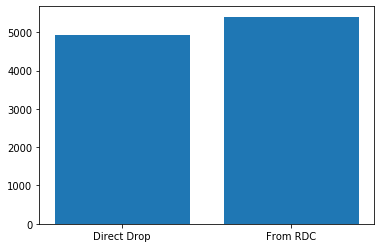

In [93]:
plt.bar(['Direct Drop', 'From RDC'], [4920, 5404])
plt.show()

In [94]:
df['fulfill via'].isnull().sum()

0

In [153]:
df1 = pd.DataFrame(df.groupby(['fulfill via', 'country'])['id'].count())

## Need to present properly

In [164]:
df1.head()

id
fulfill via country         
Direct Drop Afghanistan    3
            Angola         4
            Benin          4
            Botswana      63
            Burkina Faso   2

# Column 9 - Vendor Inco term

## The vendor INCO term (also known as International Commercial Terms) for Direct Drop deliveries, Not applicable for from RDC deliveries ("NA - From RDC")

### Incoterms, a widely-used terms of sale, are a set of 11 internationally recognized rules which define the responsibilities of sellers and buyers. Incoterms specifies who is responsible for paying for and managing the shipment, insurance, documentation, customs clearance, and other logistical activities.

The seven Incoterms® 2020 rules for any mode(s) of transport are: 

    EXW - Ex Works (insert place of delivery)

    FCA  - Free Carrier (Insert named place of delivery) 

    CPT  - Carriage Paid to (insert place of destination) 

    CIP -  Carriage and Insurance Paid To (insert place of destination)  

    DAP - Delivered at Place (insert named place of destination)  

    DPU - Delivered at Place Unloaded (insert of place of destination)  

    DDP - Delivered Duty Paid (Insert place of destination).  

In [165]:
df['vendor inco term'].nunique()

8

In [166]:
df['vendor inco term'].unique()

array(['EXW', 'FCA', 'DDU', 'CIP', 'DDP', 'CIF', 'N/A - From RDC', 'DAP'],
      dtype=object)

In [167]:
df['vendor inco term'].isnull().sum()

0

In [170]:
df.groupby('vendor inco term')['id'].count()

vendor inco term
CIF                  3
CIP                275
DAP                  9
DDP               1443
DDU                 15
EXW               2778
FCA                397
N/A - From RDC    5404
Name: id, dtype: int64

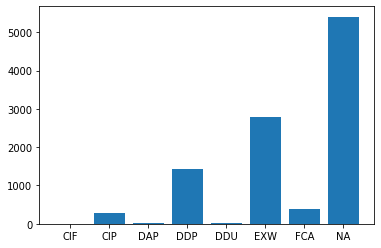

In [171]:
plt.bar(['CIF', 'CIP','DAP','DDP','DDU','EXW','FCA','NA'], [3,275,9,1443,15,2778,397,5404])
plt.show()

# Column 10 - Shipment mode

## Method by which commodities are shipped

In [181]:
df['shipment mode'].isnull().sum()

360

## List of country with total no. of null values

In [213]:
df[df['shipment mode'].isnull()].groupby('country')['id'].count()

country
Botswana           3
Côte d'Ivoire    113
Ethiopia          18
Guyana             5
Haiti              2
Namibia            2
Nigeria           36
South Africa      42
Tanzania          20
Uganda             8
Zambia            99
Zimbabwe          12
Name: id, dtype: int64

In [176]:
df['shipment mode'].nunique()

4

In [177]:
df['shipment mode'].unique()

array(['Air', nan, 'Truck', 'Air Charter', 'Ocean'], dtype=object)

In [180]:
df.groupby(['shipment mode'])['id'].count()

shipment mode
Air            6113
Air Charter     650
Ocean           371
Truck          2830
Name: id, dtype: int64

## Transportation mode

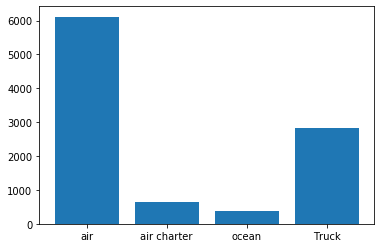

In [208]:
plt.bar(['air', 'air charter', 'ocean', 'Truck'],[6113,650,371,2830])
plt.show()

In [191]:
df3 = pd.DataFrame(df.groupby(['country','shipment mode'])['id'].count(), columns=['id'])

In [195]:
df3.shape

(85, 1)

In [303]:
df3[0:60]

id
country            shipment mode     
Afghanistan        Air              3
Angola             Air              5
                   Truck            2
Belize             Air              1
Benin              Air             13
Botswana           Air             63
                   Truck            4
Burkina Faso       Air              2
Burundi            Air             98
Cameroon           Air             61
                   Air Charter     14
Congo, DRC         Air            331
                   Truck            2
Côte d'Ivoire      Air            682
                   Air Charter      5
                   Ocean            5
                   Truck          278
Dominican Republic Air             49
                   Truck            3
Ethiopia           Air            194
                   Ocean            1
                   Truck            3
Ghana              Air             43
                   Ocean            2
                   Truck           13
Guatemala          Air             15
Guinea             Air              1
Guyana             Air            229
                   Truck            3
Haiti              Air            560
                   Air Charter      4
                   Ocean           83
                   Truck            6
Kazakhstan         Air              2
Kenya              Air             82
                   Truck           29
Kyrgyzstan         Air              2
Lebanon            Air              8
Lesotho            Air              4
Liberia            Air              6
Libya              Air              8
Malawi             Air             10
                   Ocean            4
Mali               Air             17
Mozambique         Air            290
                   Ocean            4
                   Truck          337
Namibia            Air             87
                   Truck            6
Nigeria            Air            547
                   Air Charter    608
                   Ocean            1
                   Truck            2
Pakistan           Air             15
Rwanda             Air            338
                   Air Charter      1
                   Ocean           20
                   Truck           71
Senegal            Air              3
Sierra Leone       Air              4

In [206]:
df3[60:89]

id
country      shipment mode     
South Africa Air            230
             Ocean          229
             Truck          905
South Sudan  Air            162
             Truck            2
Sudan        Air             46
Swaziland    Air             32
             Ocean            2
             Truck            1
Tanzania     Air            306
             Ocean            6
             Truck          187
Togo         Air              3
Uganda       Air            534
             Ocean            8
             Truck          229
Vietnam      Air            687
             Truck            1
Zambia       Air            195
             Ocean            3
             Truck          386
Zimbabwe     Air            145
             Air Charter     18
             Ocean            3
             Truck          360

In [194]:
type(df3)

pandas.core.frame.DataFrame

# Column 11 - PQ First Sent to Client Date

### Date the PQ is first sent to the client

"Pre-PQ Process" indicates deliveries that occurred before the PQ process was put in place in mid-2009.  "Date Not Captured" where date was not captured.

In [214]:
df.columns

Index(['id', 'project code', 'pq #', 'po / so #', 'asn/dn #', 'country',
       'managed by', 'fulfill via', 'vendor inco term', 'shipment mode',
       'pq first sent to client date', 'po sent to vendor date',
       'scheduled delivery date', 'delivered to client date',
       'delivery recorded date', 'product group', 'sub classification',
       'vendor', 'item description', 'molecule/test type', 'brand', 'dosage',
       'dosage form', 'unit of measure (per pack)', 'line item quantity',
       'line item value', 'pack price', 'unit price', 'manufacturing site',
       'first line designation', 'weight (kilograms)', 'freight cost (usd)',
       'line item insurance (usd)'],
      dtype='object')

In [222]:
df['pq first sent to client date'].isnull().sum()

0

In [215]:
df['pq first sent to client date'].nunique()

765

In [217]:
df['pq first sent to client date'].unique()

array(['Pre-PQ Process', '7/25/2012', 'Date Not Captured', '11/18/2009',
       '5/3/2013', '8/19/2014', '1/6/2012', '2/22/2013', '10/28/2014',
       '2/20/2013', '2/17/2012', '11/9/2011', '2/6/2014', '3/10/2011',
       '9/11/2014', '4/30/2014', '4/8/2014', '7/11/2013', '10/5/2012',
       '6/13/2014', '8/4/2011', '3/18/2010', '6/19/2009', '1/28/2015',
       '8/12/2009', '9/3/2010', '12/8/2011', '10/17/2012', '9/2/2009',
       '9/24/2014', '6/3/2014', '8/11/2014', '8/29/2011', '7/9/2014',
       '6/17/2014', '6/21/2011', '3/15/2012', '3/10/2015', '6/25/2009',
       '12/11/2013', '1/22/2014', '2/7/2013', '4/11/2012', '8/13/2014',
       '4/1/2014', '7/16/2009', '5/15/2014', '10/20/2009', '10/17/2014',
       '5/17/2013', '10/5/2011', '7/26/2013', '7/15/2013', '7/10/2013',
       '5/21/2014', '7/18/2013', '1/29/2013', '4/26/2013', '10/8/2009',
       '2/2/2010', '4/30/2013', '7/17/2014', '6/24/2011', '4/15/2014',
       '5/16/2011', '11/14/2013', '2/3/2013', '12/29/2014', '11/12/201

## Total 2476 pre pq process, and 205 date not captured

In [219]:
df[df['pq first sent to client date'] == 'Pre-PQ Process'].shape

(2476, 33)

In [220]:
df[df['pq first sent to client date'] == 'Date Not Captured'].shape

(205, 33)

# Column 12 - po (purchase order) sent to vendor date

Not applicable for from RDC deliveries ("NA - From RDC"). "Date Not Captured" where date was not captured.

In [223]:
df['po sent to vendor date'].isnull().sum()

0

In [221]:
df['po sent to vendor date'].nunique()

897

In [224]:
df['po sent to vendor date'].unique()

array(['Date Not Captured', '11/13/2006', '12/1/2006', '12/22/2006',
       '1/10/2007', '8/15/2012', '4/12/2007', '5/13/2007', '5/17/2007',
       '7/13/2007', '7/4/2007', '7/26/2007', '10/3/2007', '8/28/2007',
       '11/12/2007', '11/19/2007', '11/21/2007', '12/10/2007', '1/4/2008',
       '2/27/2008', '3/3/2008', '2/28/2008', '2/29/2008', '3/17/2008',
       '3/13/2008', '3/18/2008', '3/31/2008', '2/20/2008', '4/4/2008',
       '5/14/2008', '5/15/2008', '5/20/2008', '5/23/2008', '7/1/2008',
       '7/2/2008', '7/3/2008', '7/24/2008', '7/25/2008', '7/31/2008',
       '8/26/2008', '8/27/2008', '9/3/2008', '3/6/2009', '9/24/2008',
       '10/2/2008', '12/5/2007', '11/19/2008', '12/19/2008', '1/5/2009',
       '1/16/2009', '10/21/2008', '2/5/2009', '2/18/2009', '3/4/2009',
       '3/18/2009', '6/15/2009', '3/27/2009', '3/25/2009', '3/30/2009',
       '4/2/2009', '4/4/2009', '4/9/2009', '4/15/2009', '4/29/2009',
       '5/27/2009', '5/18/2009', '6/2/2009', '6/5/2009', '4/19/2006',
     

## 328 DATE not captured

In [225]:
df[df['po sent to vendor date'] == 'Date Not Captured'].shape

(328, 33)

In [232]:
df['po sent to vendor date'].dtype

dtype('O')

## Changing the data type of column, but first replace 'data not captured'  to nan value

In [347]:
df['po sent to vendor date'] = df['po sent to vendor date'].replace('Date Not Captured',np.nan, inplace = True)

In [348]:
df['po sent to vendor date'] = pd.to_datetime(df['po sent to vendor date'])

# Column 13 - Scheduled Delivery Date

## Current anticipated delivery date

In [227]:
df['scheduled delivery date'].nunique()

2006

In [228]:
df['scheduled delivery date'].isnull().sum()

0

In [229]:
df['scheduled delivery date'].unique()

array(['2-Jun-06', '14-Nov-06', '27-Aug-06', ..., '27-Oct-13',
       '29-Jan-14', '9-Sep-15'], dtype=object)

In [231]:
df['scheduled delivery date'].dtypes

dtype('O')

In [234]:
df['scheduled delivery date'] = pd.to_datetime(df['scheduled delivery date'])

In [235]:
df['scheduled delivery date'].dtypes

dtype('<M8[ns]')

In [236]:
df['scheduled delivery date'].head()

0   2006-06-02
1   2006-11-14
2   2006-08-27
3   2006-09-01
4   2006-08-11
Name: scheduled delivery date, dtype: datetime64[ns]

# Column 14 - Delivered to Client Date

Transactions are included in the dataset only after the goods have been delivered to the client

In [238]:
df['delivered to client date'].isnull().sum()

0

In [237]:
df['delivered to client date'].nunique()

2093

In [239]:
df['delivered to client date'].dtype

dtype('O')

In [240]:
df['delivered to client date'] = pd.to_datetime(df['delivered to client date'])

In [242]:
df['delivered to client date'].dtype

dtype('<M8[ns]')

In [243]:
df['delivered to client date'].head()

0   2006-06-02
1   2006-11-14
2   2006-08-27
3   2006-09-01
4   2006-08-11
Name: delivered to client date, dtype: datetime64[ns]

In [244]:
df['delivered to client date'].isnull().sum()

0

# Total cases where actual delivery date and expected delivery date are same

In [248]:
df[df['delivered to client date'] <=  df['scheduled delivery date']].shape

(9138, 33)

In [249]:
df[df['delivered to client date'] >  df['scheduled delivery date']].shape

(1186, 33)

In [250]:
df.shape

(10324, 33)

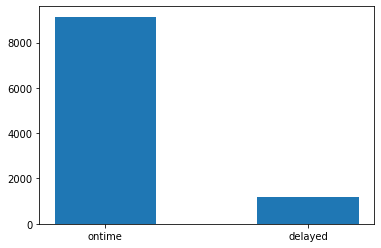

In [252]:
plt.bar(['ontime', 'delayed'],[9138, 1186], width = 0.5)
plt.show()

In [255]:
df[df['delivered to client date'] >  df['scheduled delivery date']][['delivered to client date', 'scheduled delivery date']].head()

,delivered to client date,scheduled delivery date
25,2007-08-21,2007-08-13
73,2009-04-08,2009-03-10
124,2009-07-10,2009-06-12
146,2007-03-30,2007-03-15
204,2008-07-14,2008-07-10


# List of country and frequency of delays

In [265]:
a = (df[df['delivered to client date'] >  df['scheduled delivery date']]).groupby('country')['id'].count()

In [268]:
a

country
Benin                   3
Botswana                2
Burundi                38
Cameroon                7
Congo, DRC             83
Côte d'Ivoire         134
Dominican Republic      4
Ethiopia               12
Ghana                   8
Guatemala               2
Guyana                 24
Haiti                  62
Kenya                  14
Libya                   1
Mozambique            116
Namibia                 1
Nigeria               142
Rwanda                 37
Senegal                 1
South Africa          115
South Sudan            21
Swaziland               3
Tanzania               66
Togo                    1
Uganda                 98
Vietnam                 6
Zambia                108
Zimbabwe               77
Name: id, dtype: int64

# Total delivery  sent

In [266]:
b = df.groupby('country')['id'].count()

In [272]:
b

country
Afghanistan              3
Angola                   7
Belize                   1
Benin                   13
Botswana                70
Burkina Faso             2
Burundi                 98
Cameroon                75
Congo, DRC             333
Côte d'Ivoire         1083
Dominican Republic      52
Ethiopia               216
Ghana                   58
Guatemala               15
Guinea                   1
Guyana                 237
Haiti                  655
Kazakhstan               2
Kenya                  111
Kyrgyzstan               2
Lebanon                  8
Lesotho                  4
Liberia                  6
Libya                    8
Malawi                  14
Mali                    17
Mozambique             631
Namibia                 95
Nigeria               1194
Pakistan                15
Rwanda                 430
Senegal                  3
Sierra Leone             4
South Africa          1406
South Sudan            164
Sudan                   46
Swaziland           

In [296]:
df5 = pd.concat([b,a], axis =1)

C:\Users\Delight Com\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


# Total deliveries vs delayed deliveries, and % age of time delivery is late

In [297]:
df5.columns = ['total delivery', 'late delivery']

In [298]:
df5['late delivery'].fillna(0, inplace = True)

In [299]:
df5['% on time'] =  (df5['late delivery']/df5['total delivery'])*100

In [301]:
df5.sort_values(by ='% on time', ascending = False)

,total delivery,late delivery,% on time
Burundi,98,38.0,38.775510
Senegal,3,1.0,33.333333
Togo,3,1.0,33.333333
"Congo, DRC",333,83.0,24.924925
Benin,13,3.0,23.076923
Mozambique,631,116.0,18.383518
Zambia,683,108.0,15.812592
Zimbabwe,538,77.0,14.312268
Ghana,58,8.0,13.793103
Guatemala,15,2.0,13.333333


# Column 15 - delivery recorded date

In [304]:
df['delivery recorded date'].isnull().sum()

0

In [305]:
df['delivery recorded date'].nunique()

2042

In [306]:
df['delivery recorded date'] =pd.to_datetime(df['delivery recorded date'])

In [307]:
df['delivery recorded date'].dtype

dtype('<M8[ns]')

# every date data, is not recorded on the day of delivery

In [308]:
df[df['delivery recorded date']!= df['delivered to client date']].shape

(1911, 33)

In [320]:
df6 = df[df['delivery recorded date']!= df['delivered to client date']][['id','delivery recorded date', 'delivered to client date' ]].head()

In [321]:
df6.head()

,id,delivery recorded date,delivered to client date
431,4190,2008-01-24,2007-01-24
2684,12959,2015-05-14,2015-05-12
2691,13027,2014-08-06,2014-07-29
2696,13106,2014-10-01,2014-09-16
2699,13148,2014-02-07,2014-01-14


In [322]:
df6['recorded delivery year'] = pd.DatetimeIndex(df6['delivery recorded date']).year

In [323]:
df6['client delivery year'] = pd.DatetimeIndex(df6['delivered to client date']).year

In [324]:
df6.head()

,id,delivery recorded date,delivered to client date,recorded delivery year,client delivery year
431,4190,2008-01-24,2007-01-24,2008,2007
2684,12959,2015-05-14,2015-05-12,2015,2015
2691,13027,2014-08-06,2014-07-29,2014,2014
2696,13106,2014-10-01,2014-09-16,2014,2014
2699,13148,2014-02-07,2014-01-14,2014,2014


## Only one value where year is written wrong, by mistake

In [325]:
df6[df6['recorded delivery year'] != df6['client delivery year']].head()

,id,delivery recorded date,delivered to client date,recorded delivery year,client delivery year
431,4190,2008-01-24,2007-01-24,2008,2007


In [336]:
df[df['id'] ==  4190].index

Int64Index([431], dtype='int64')

## Change the year of delivery to client date

In [342]:
df.loc[431,'delivered to client date'] = pd.datetime(2008,1,24)

In [343]:
df[df['id'] ==  4190]['delivered to client date']

431   2008-01-24
Name: delivered to client date, dtype: datetime64[ns]

In [350]:
df.dtypes

id                                       int32
project code                            object
pq #                                    object
po / so #                               object
asn/dn #                                object
country                                 object
managed by                              object
fulfill via                             object
vendor inco term                        object
shipment mode                           object
pq first sent to client date            object
po sent to vendor date          datetime64[ns]
scheduled delivery date         datetime64[ns]
delivered to client date        datetime64[ns]
delivery recorded date          datetime64[ns]
product group                           object
sub classification                      object
vendor                                  object
item description                        object
molecule/test type                      object
brand                                   object
dosage       